# Regresión logística

La _regresión logística_ es un modelo de clasificación binario, esto quiere decir que la variable dependiente solo puede tomar dos valores $\lbrace {0, 1} \rbrace$.

In [1]:
from mpl_toolkits.mplot3d import Axes3D # Para generar gráficos tridimencionales
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### MLE como base para la regresión logística

Problema de MLE:

$$
max \sum_i log \; P(y_i|x_i; h)
$$

Donde:
- $y_i$: Clase o categoría de cada elemento.
- $x_i$: Atributos de cada elemento.

Cada elemento del dataset satisface una distribución de Bernoulli:

$$P = 
     \begin{cases}
        P, &\quad \text{si } y = 1\\
        1 - P,  &\quad\text{si } y = 0\\
     \end{cases}
$$

Para el caso anterior, la verosimilitud esta dada por:
$$
   L = {\hat y}y + (1 - {\hat y})(1 - y)
$$

Esta función da como resultado probabilidades altas cuando ${\hat y} \sim y $

Donde:
 - ${\hat y}$: Probabilidad de $y$ 
 - $y$: Valor resultante dado un valor independiente $x$

In [2]:
def likelihood(y, yp):
  return (yp*y) + (1 -yp) * (1-y)

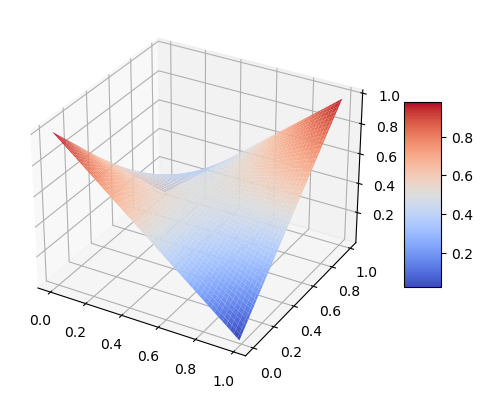

In [7]:
fig = plt.figure()
ax = plt.axes(projection = "3d")

Y = np.arange(0,1, 0.01)
YP = np.arange(0,1, 0.01)

Y, YP = np.meshgrid(Y, YP) 
Z = likelihood(Y, YP)

surf = ax.plot_surface(Y, YP, Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Considerando $p \rightarrow log(p)$, y sumando la verosimilitud para todos los puntos del dataset obtenemos:

$$
  max \sum_i (y \; log \; {\hat y} + (1 - y) log(1- {\hat y})
$$

$$
  = min - \sum_i (y \; log \; {\hat y} + (1 - y) log(1- {\hat y}))
$$

Lo anterior es la función de costo para clasificación conocida como _Cross-Entropy_

### Regresión logística con Scikit Learn

$$ 
  {\hat y} = \frac 1 {1 + exp(-log \; odds)}
$$

Donde
- $log \; odds = {\beta_0}+ {\beta_1}x_1 + ... + {\beta_n}x_n $, combinación líneal que se asemeja a la ecuación de la línea recta.
- ${\beta}$: Parámetros del modelo, también conocidos como coeficientes de regresión.

Los coeficientes de regresión se van modificando hasta encontrar el mejor ajuste para la línea dados los datos predictores.

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [9]:
atr_names = ["sepal length", "sepal width", "petal length", "petal width"]
X, y = load_iris(return_X_y=True)
X[:2] # Longitud de los tipos de flores

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [15]:
y[:100] # clase de flor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

0, 1 y 2 son los códigos de los 3 tipos de flores iris, el dataset contiene 150 elementos (50 de cada uno)

Tomamos solo los 100 primeros, donde sus claves son 0 y 1, esto nos servira para el entrenamiento del modelo de regresión logística.

In [16]:
# random_state: Generador aleatorio que inicializa las variables del modelo
# solver: Método de optimicación del modelo (mejor combinación de parámetros)
clf = LogisticRegression(random_state=10, solver="liblinear").fit(X[:100], y[:100])

Parámetros resultantes $\beta_i$

In [17]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

Los coeficientes resultantes son los parámetros que mejor se ajustan al modelo de clasificación dadas las categorias utilizadas de los datos en el dataset utilizado en el ejemplo.